In [80]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from helper_functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
## consider one of the sessions for easy checking for each region

## CA3
topdir_ca3 = 'gor01-6-7'
session_ca3 = '2006-6-7_11-26-53'

## CA1
topdir_ca1 = 'ec013.29'
session_ca1 = 'ec013.442'

## EC
topdir_ec = 'ec013.15'
session_ec = 'ec013.156'



In [15]:
print(find_track_length('CA3', topdir_ca3, session_ca3))

77.17692


(array([6508., 1643., 1370., 1484., 4000., 3441., 1072., 1362., 2201.,
        7159.]),
 array([  0.        ,  19.99074172,  39.98148344,  59.97222516,
         79.96296687,  99.95370859, 119.94445031, 139.93519203,
        159.92593375, 179.91667547, 199.90741719]),
 <BarContainer object of 10 artists>)

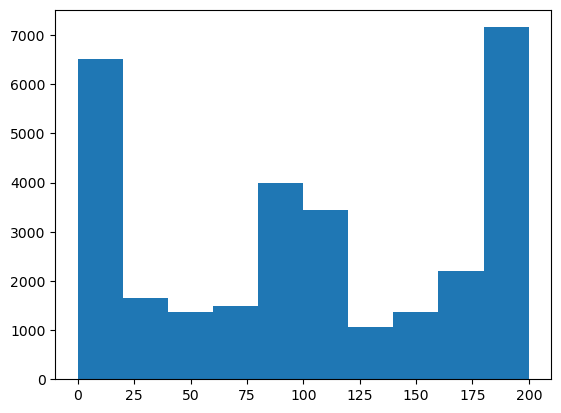

In [17]:
xc_df = circularize_location('CA1', topdir_ca1, session_ca1)

plt.hist(xc_df.iloc[:, 0])
# plt.hist(xc_df.iloc[:, -1])

(array([10.,  1.,  0.,  2., 11.,  5.,  2.,  2.,  3., 13.]),
 array([  4.10475049,  23.30507489,  42.50539928,  61.70572368,
         80.90604808, 100.10637248, 119.30669687, 138.50702127,
        157.70734567, 176.90767007, 196.10799446]),
 <BarContainer object of 10 artists>)

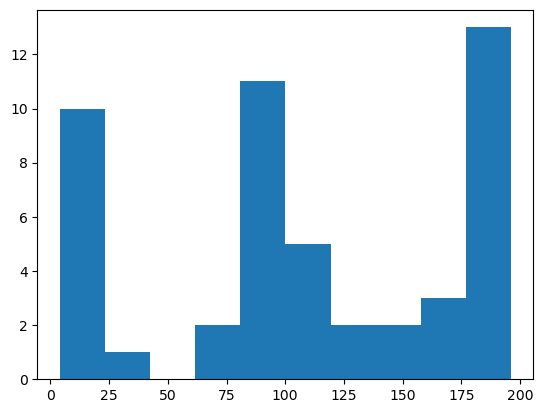

In [138]:
cell_spt_df,  circ_loc = cell_spiketime_location_file_generator('CA3', topdir_ca3, session_ca3, delay_time=-0.5)

plt.hist(cell_spt_df.loc[cell_spt_df['cell'] == 11]['circularized_location'])


0.077
p-value = 0.2622


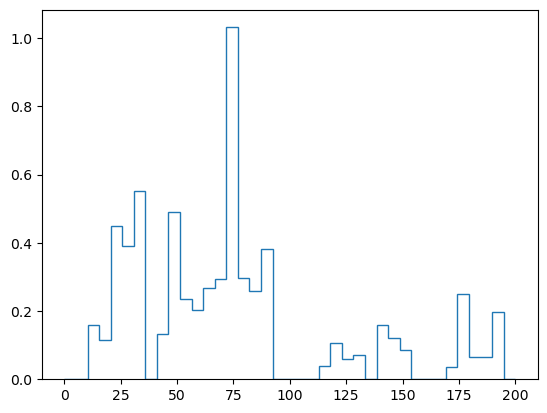

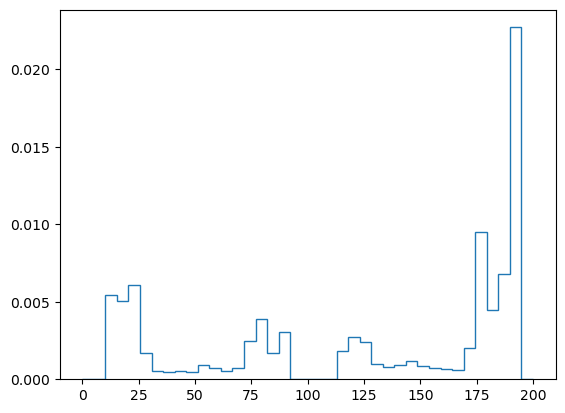

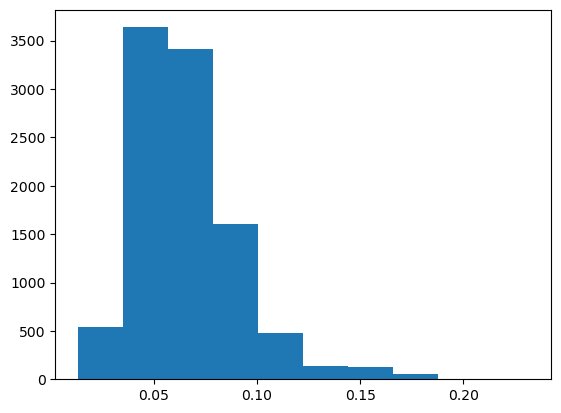

In [139]:
mi_list = []
rx, px, binsx = firing_rate_location_distributions_generator(cell_spt_df, circ_loc, 'CA3', topdir_ca3, session_ca3, 14)
for _ in range(10000):
    rx_resampled = np.random.choice(rx, size = len(rx), replace = True)
    px_resampled = np.random.choice(px, size = len(px), replace = True)
    mi_list.append(skaggs_MI(rx_resampled, px_resampled))
    

plt.figure()
plt.stairs(rx, binsx)

plt.figure()
plt.stairs(px, binsx)
print(np.round(skaggs_MI(rx, px), 3))

plt.figure()
plt.hist(mi_list)

print(f"p-value = {np.sum(mi_list >= np.round(skaggs_MI(rx, px), 3))/len(mi_list)}")

In [123]:
arr = np.arange(10)
print(arr[arr == 0])

[0]


In [133]:
aa = np.array([1, 5, 10])
aa[np.argmax(aa)]

10